# **NAME: DIYAN ALI SHAIKH**

# **ENROLLMENT: 02-131202-005**

# **REG NO: 69961**

(I have written the explanation in this file, please read the explanations of each cell above them from this file.)

(In Part 4, theres mostly two plots in one cell so make sure to scroll the figures.)

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# **PART 1**

**MOUNTING DATASET FROM GOOGLE DRIVE**


Displaying the first five columns of the dataset only to check that it has been mounted properly.

Note: Please add the dataset link from your drive.

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM_Assignment_02_Dataset.csv')
dataset.head(5)

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,26/1/2011,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,27/7/2011,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,Active Life; Dog Parks; Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,27/5/2010,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,Tires; Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,5/1/2012,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw


--> Checking the data types of the columns of the dataset.

In [ ]:
dataset.dtypes

business_categories    object
business_city          object
business_id            object
date                   object
stars                   int64
text                   object
useful                  int64
user_id                object
dtype: object

**QUESTION 1.1:**

Printing the length/rows (229907) and columns' count (8).

(I used .shape instead of len() in this assignment because I wanted to be sure I did not accidentally touch the columns)

In [ ]:
dataset.shape

(229907, 8)

Here I am just printing the columns that have null values.

--> Business Categories column has 777 null values.

--> text column has 6 null values.

In [ ]:
nullValues = pd.isnull(dataset).sum(axis = 0)
nullColumns = nullValues[nullValues > 0]
nullColumns

business_categories    777
text                     6
dtype: int64

**QUESTION 1.2:**

Dropping the rows with null values and printing the length.

In [ ]:
newSet = dataset.dropna()
newSet.shape

(229124, 8)

Removed all the rows that had the value '#NAME?' and '#VALUE!' from business_id and user_id columns and printed the length after removal.

In [ ]:
dsCleaned = newSet[newSet.business_id != '#NAME?']
dsCleaned = dsCleaned[dsCleaned.business_id != '#VALUE!']
dsCleaned = dsCleaned[dsCleaned.user_id != '#NAME?']
dsCleaned = dsCleaned[dsCleaned.user_id != '#VALUE!']
dsCleaned.shape

(222759, 8)

Checking if there is any '#NAME?' and '#VALUE!' in business_id and user_id.

Result: All the invalid data has been removed from relevant columns and the dataset has been cleaned and updated.

In [ ]:
dsCleaned.isin(['#NAME?', '#VALUE!']).sum(axis=0)

business_categories     0
business_city           0
business_id             0
date                    0
stars                   0
text                   13
useful                  0
user_id                 0
dtype: int64

# PART 2:

**QUESTION 2.1:**

Selecting random cities with a seed number of 42.

First of all, storing the random.sample()'s data in selectedData and then creating a new object (sampleData) which stores the new dataset. We use the selectedData to make sure that the sample dataset being made only includes rows with cities from selectedData using .isin() method.

Printing the length at the end.

In [ ]:
random.seed(42)
randomUniqueCities = dsCleaned['business_city'].unique()
selectedData = random.sample(list(randomUniqueCities), k=10)
sampleData = dsCleaned[dsCleaned['business_city'].isin(selectedData)]

sampleData.shape

(38654, 8)

# PART 3:

**QUESTION 3.1:**

Statistical summary of 'stars' column from sampleData.

In [ ]:
sampleData['stars'].describe()

count    38654.000000
mean         3.707922
std          1.240872
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

**QUESTION 3.2:**

We use .groupby() to group the business_id column by business_city while using .nunique which selects unique values from each column and then save them in an object. Next, renaming the business_id column to count because we counted the unique values in business_id column and grouped by business city. Now, after renaming, we can finally print the object which shows us the unique businesses in each city in sampleData.

Furthermore, we calculate the statistical summary of the renamed 'count' column.

In [ ]:
countUniqueBiz = sampleData.groupby('business_city')['business_id'].nunique().reset_index()
countUniqueBiz = countUniqueBiz.rename(columns={'business_id': 'count'})
print("Following are the unique businesses in each city:\n", countUniqueBiz)
summaryStat = countUniqueBiz['count'].describe()
print("\nFollowing are the summary statistics of count column:\n", summaryStat)

Following are the unique businesses in each city:
     business_city  count
0       Ahwatukee      3
1      Cave Creek     62
2        Glendale    580
3        Goodyear    120
4  Grand Junction      1
5    Saguaro Lake      1
6        Sun City     27
7        Surprise    151
8           Tempe   1119
9        Tolleson     22

Following are the summary statistics of count column:
 count      10.000000
mean      208.600000
std       364.492097
min         1.000000
25%         7.750000
50%        44.500000
75%       143.250000
max      1119.000000
Name: count, dtype: float64


**QUESTION 3.3:**

Same procedure and logic used as Question 3.2, the difference being that user_id is being grouped by two columns i.e business_categories and business_id. And then the statistical summary of 'count' column is being calculated.

This provides us with the data that how many unique users have rated the business. (However, the length of the data is big so only first 5 and last 5 values are being displayed)

(It's not being displayed in the same row for some reason but business_categories continues to business_id)

In [ ]:
countUniqueUser = sampleData.groupby(['business_categories', 'business_id'])['user_id'].nunique().reset_index()
countUniqueUser = countUniqueUser.rename(columns={'user_id': 'count'})
print("Following are the unique users:\n", countUniqueUser)
summaryStatUser = countUniqueUser['count'].describe()
print("\nFollowing are the summary statistics of count column:\n", summaryStatUser)

Following are the unique users:
                                     business_categories  \
0     Accessories; Fashion; Shopping; Cosmetics & Be...   
1                                           Active Life   
2                                           Active Life   
3                                           Active Life   
4                                           Active Life   
...                                                 ...   
2081  Women's Clothing; Men's Clothing; Fashion; Sho...   
2082  Women's Clothing; Thrift Stores; Shopping; Fas...   
2083  Women's Clothing; Used, Vintage & Consignment;...   
2084  Women's Clothing; Used, Vintage & Consignment;...   
2085  Women's Clothing; Used, Vintage & Consignment;...   

                 business_id  count  
0     F-HBLqU3Kvs89lkQ5CjLBQ      4  
1     HwjPC5yhvM2blTpmvlhZ2A      4  
2     RFAcGpV3m63LbUG-pi0Evg     11  
3     i2jU_fUdN5xnwXwoOtRDoA     11  
4     kJEPUMn279P_GzFMCr5l0g      5  
...                      ...  

# **PART 4:**

This part includes plotting and analysing.

Here, I have taken the cleaned dataset and the sample dataset and plotted a bar graph which shows the count of the most reviews being written by the users in each city. And this shows that Pheonix city is receiving the most reviews followed by Scottsdale and Tempe and so on. 

However, the sample dataset shows us different results because of the random cities being selected. In sample dataset, Tempe is followed by Glendale in terms of reviews being received to businesses in that city.

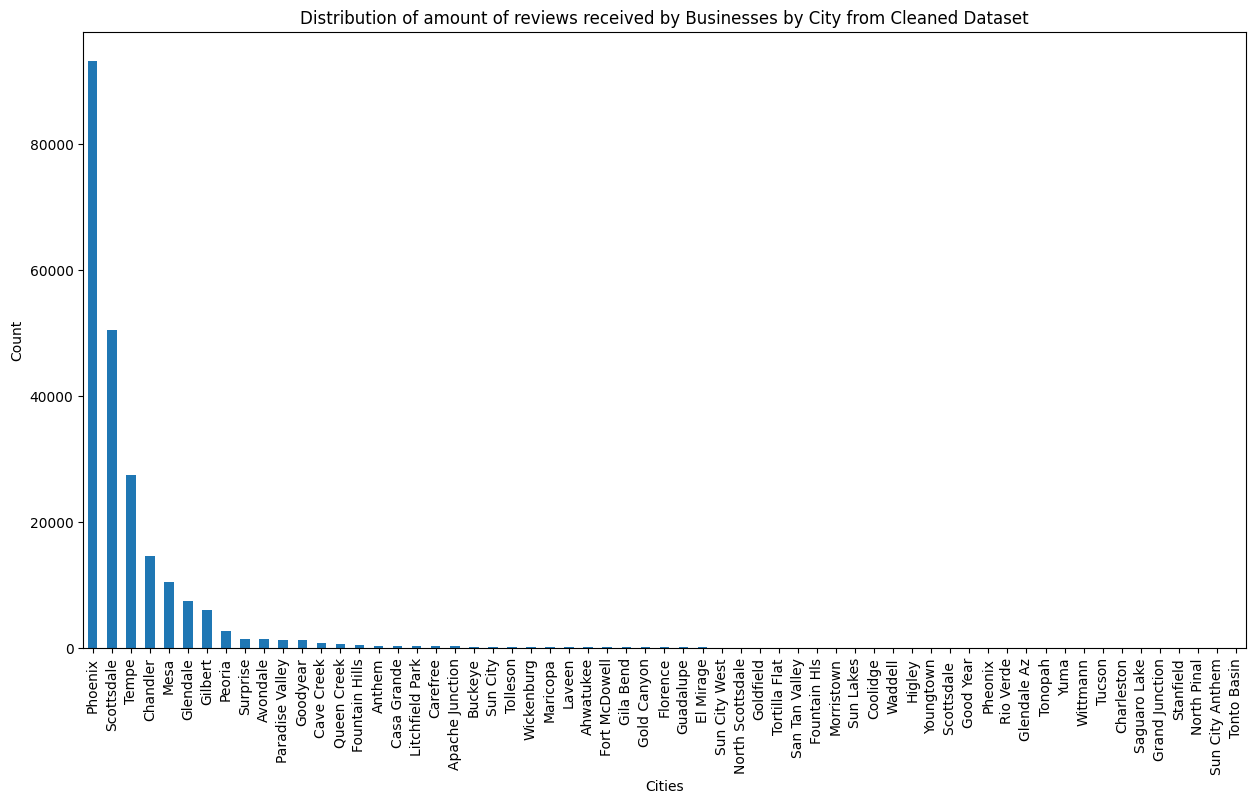

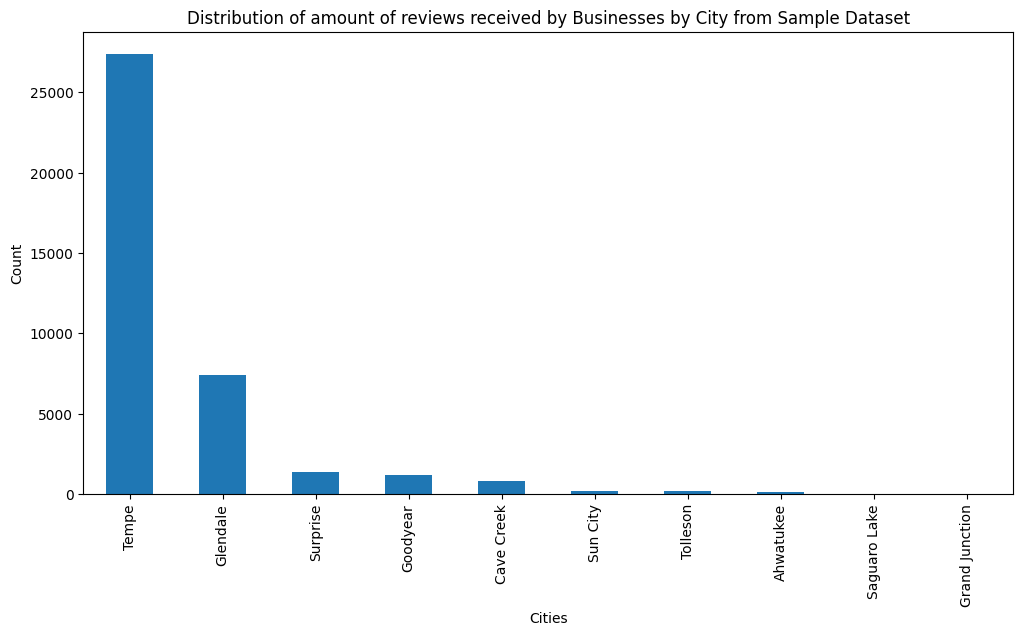

In [ ]:
# USING CLEANED DATASET

cityCountVisual = dsCleaned['business_city'].value_counts()
plt.figure(figsize=(15, 8))
cityCountVisual.plot(kind='bar')
plt.title('Distribution of amount of reviews received by Businesses by City from Cleaned Dataset')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

print("\n\n")

# USING SAMPLE DATASET

cityCountVisual = sampleData['business_city'].value_counts()
plt.figure(figsize=(12, 6))
cityCountVisual.plot(kind='bar')
plt.title('Distribution of amount of reviews received by Businesses by City from Sample Dataset')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

HERE, I am plotting the usefulness of reviews from both the dataset (cleaned and sample) using a histogram.

Both datasets show that most of the reviews have not been very useful as they have been rated 0. VERY FEW reviews have been useful as they have been voted useful nearly 20 times.

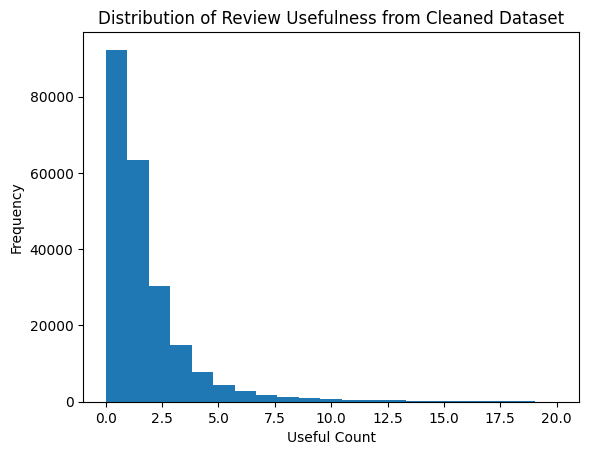

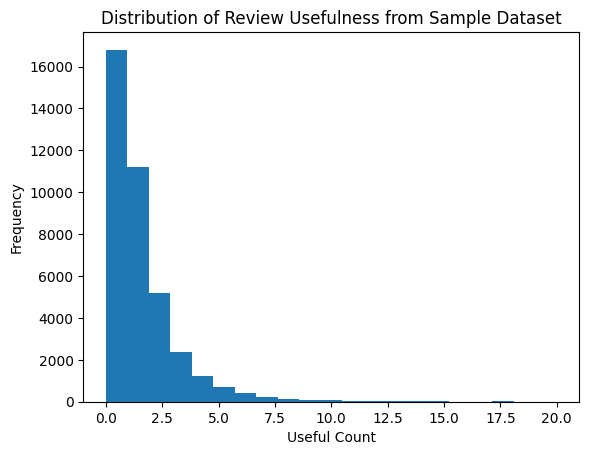

In [ ]:
# USING CLEANED DATASET

plt.hist(dsCleaned['useful'], bins=21, range=(0, 20))
plt.title('Distribution of Review Usefulness from Cleaned Dataset')
plt.xlabel('Useful Count')
plt.ylabel('Frequency')
plt.show()

print("\n\n")

# USING SAMPLE DATASET

plt.hist(sampleData['useful'], bins=21, range=(0, 20))
plt.title('Distribution of Review Usefulness from Sample Dataset')
plt.xlabel('Useful Count')
plt.ylabel('Frequency')
plt.show()

Here, this is a scatter plot that shows the correlation between a review's usefulness and its ratings.

These scatterplots show that more 5.0 star ratings have been rated useful than 1.0 star rating. Which goes to show that 5.0 star ratings have proved to be more useful to users than ratings of 1.0.

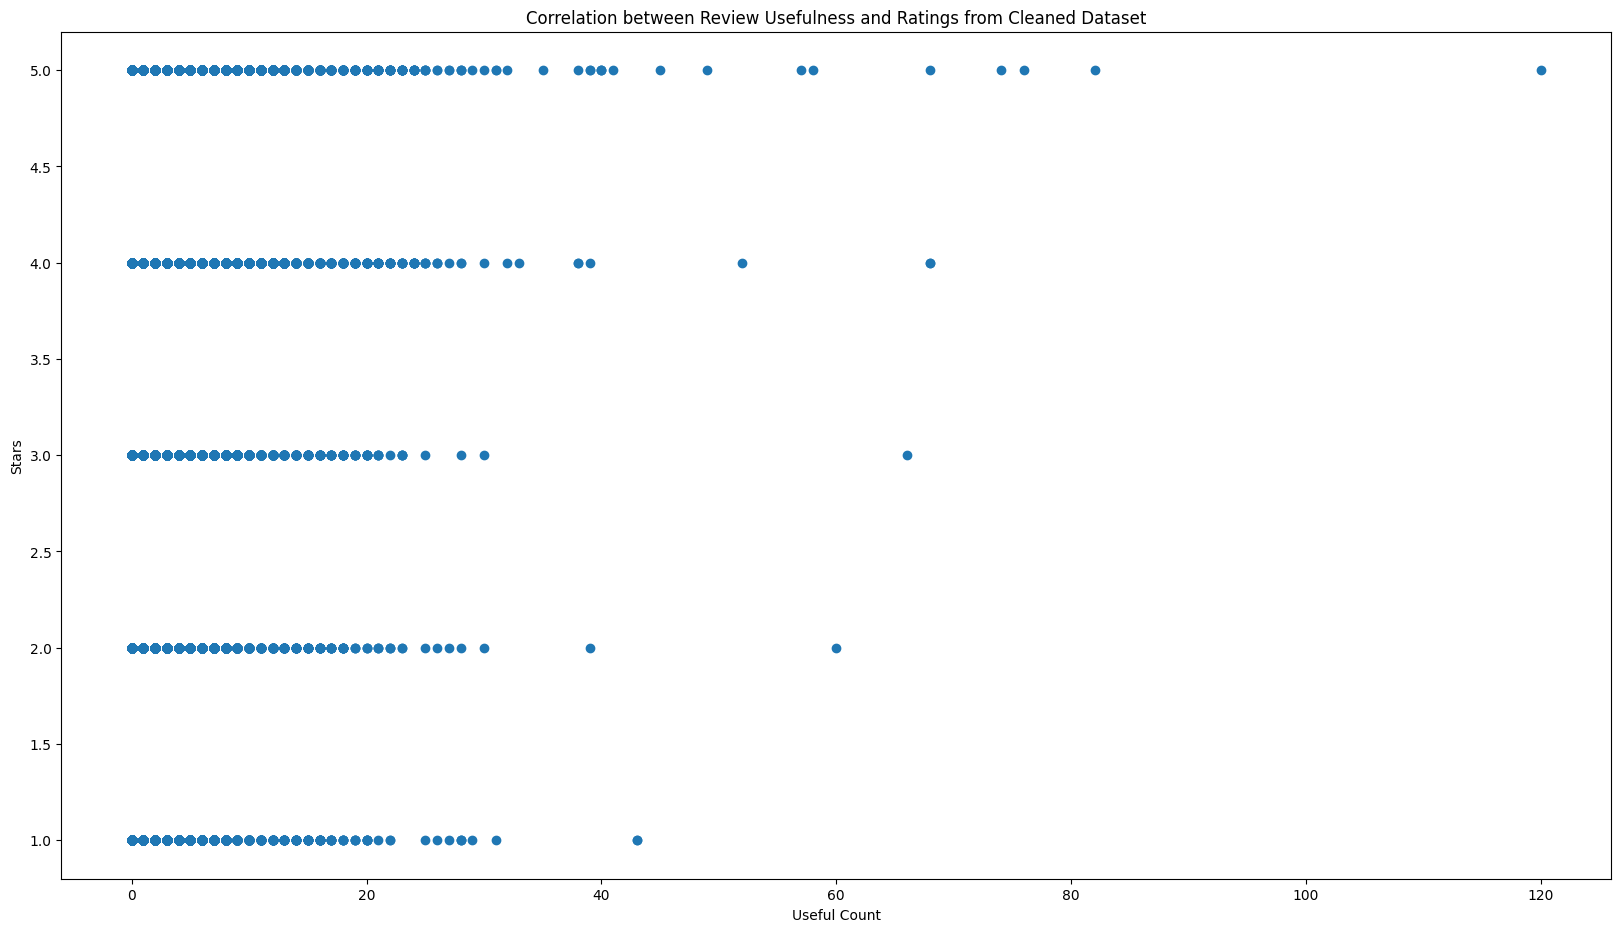

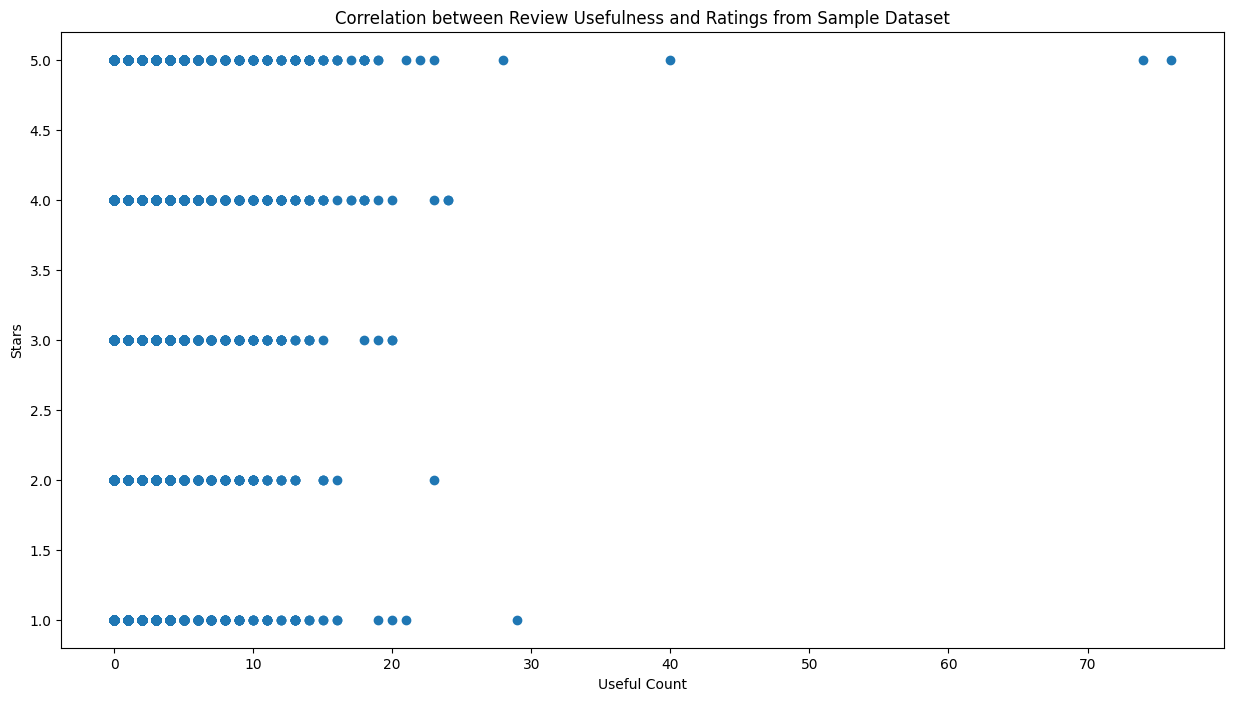

In [ ]:
# USING CLEANED DATASET

plt.figure(figsize=(20, 11))
plt.scatter(dsCleaned['useful'], dsCleaned['stars'])
plt.title('Correlation between Review Usefulness and Ratings from Cleaned Dataset')
plt.xlabel('Useful Count')
plt.ylabel('Stars')
plt.show()

print("\n\n")

# USING SAMPLE DATASET

plt.figure(figsize=(15, 8))
plt.scatter(sampleData['useful'], sampleData['stars'])
plt.title('Correlation between Review Usefulness and Ratings from Sample Dataset')
plt.xlabel('Useful Count')
plt.ylabel('Stars')
plt.show()

Here I am plotting a box plot and analyzing that which cities tend to have more stars. Cleaned dataset plots the boxplot of every city and its stars against every other city as is the case with Sample dataset.

From the boxplot, it is evident that pheonix city gets the most 5 star ratings than all the other cities.


(I suddenly used seaborn here because I was having trouble with matplotlib's figure's figsize and it was not working properly for some reason)

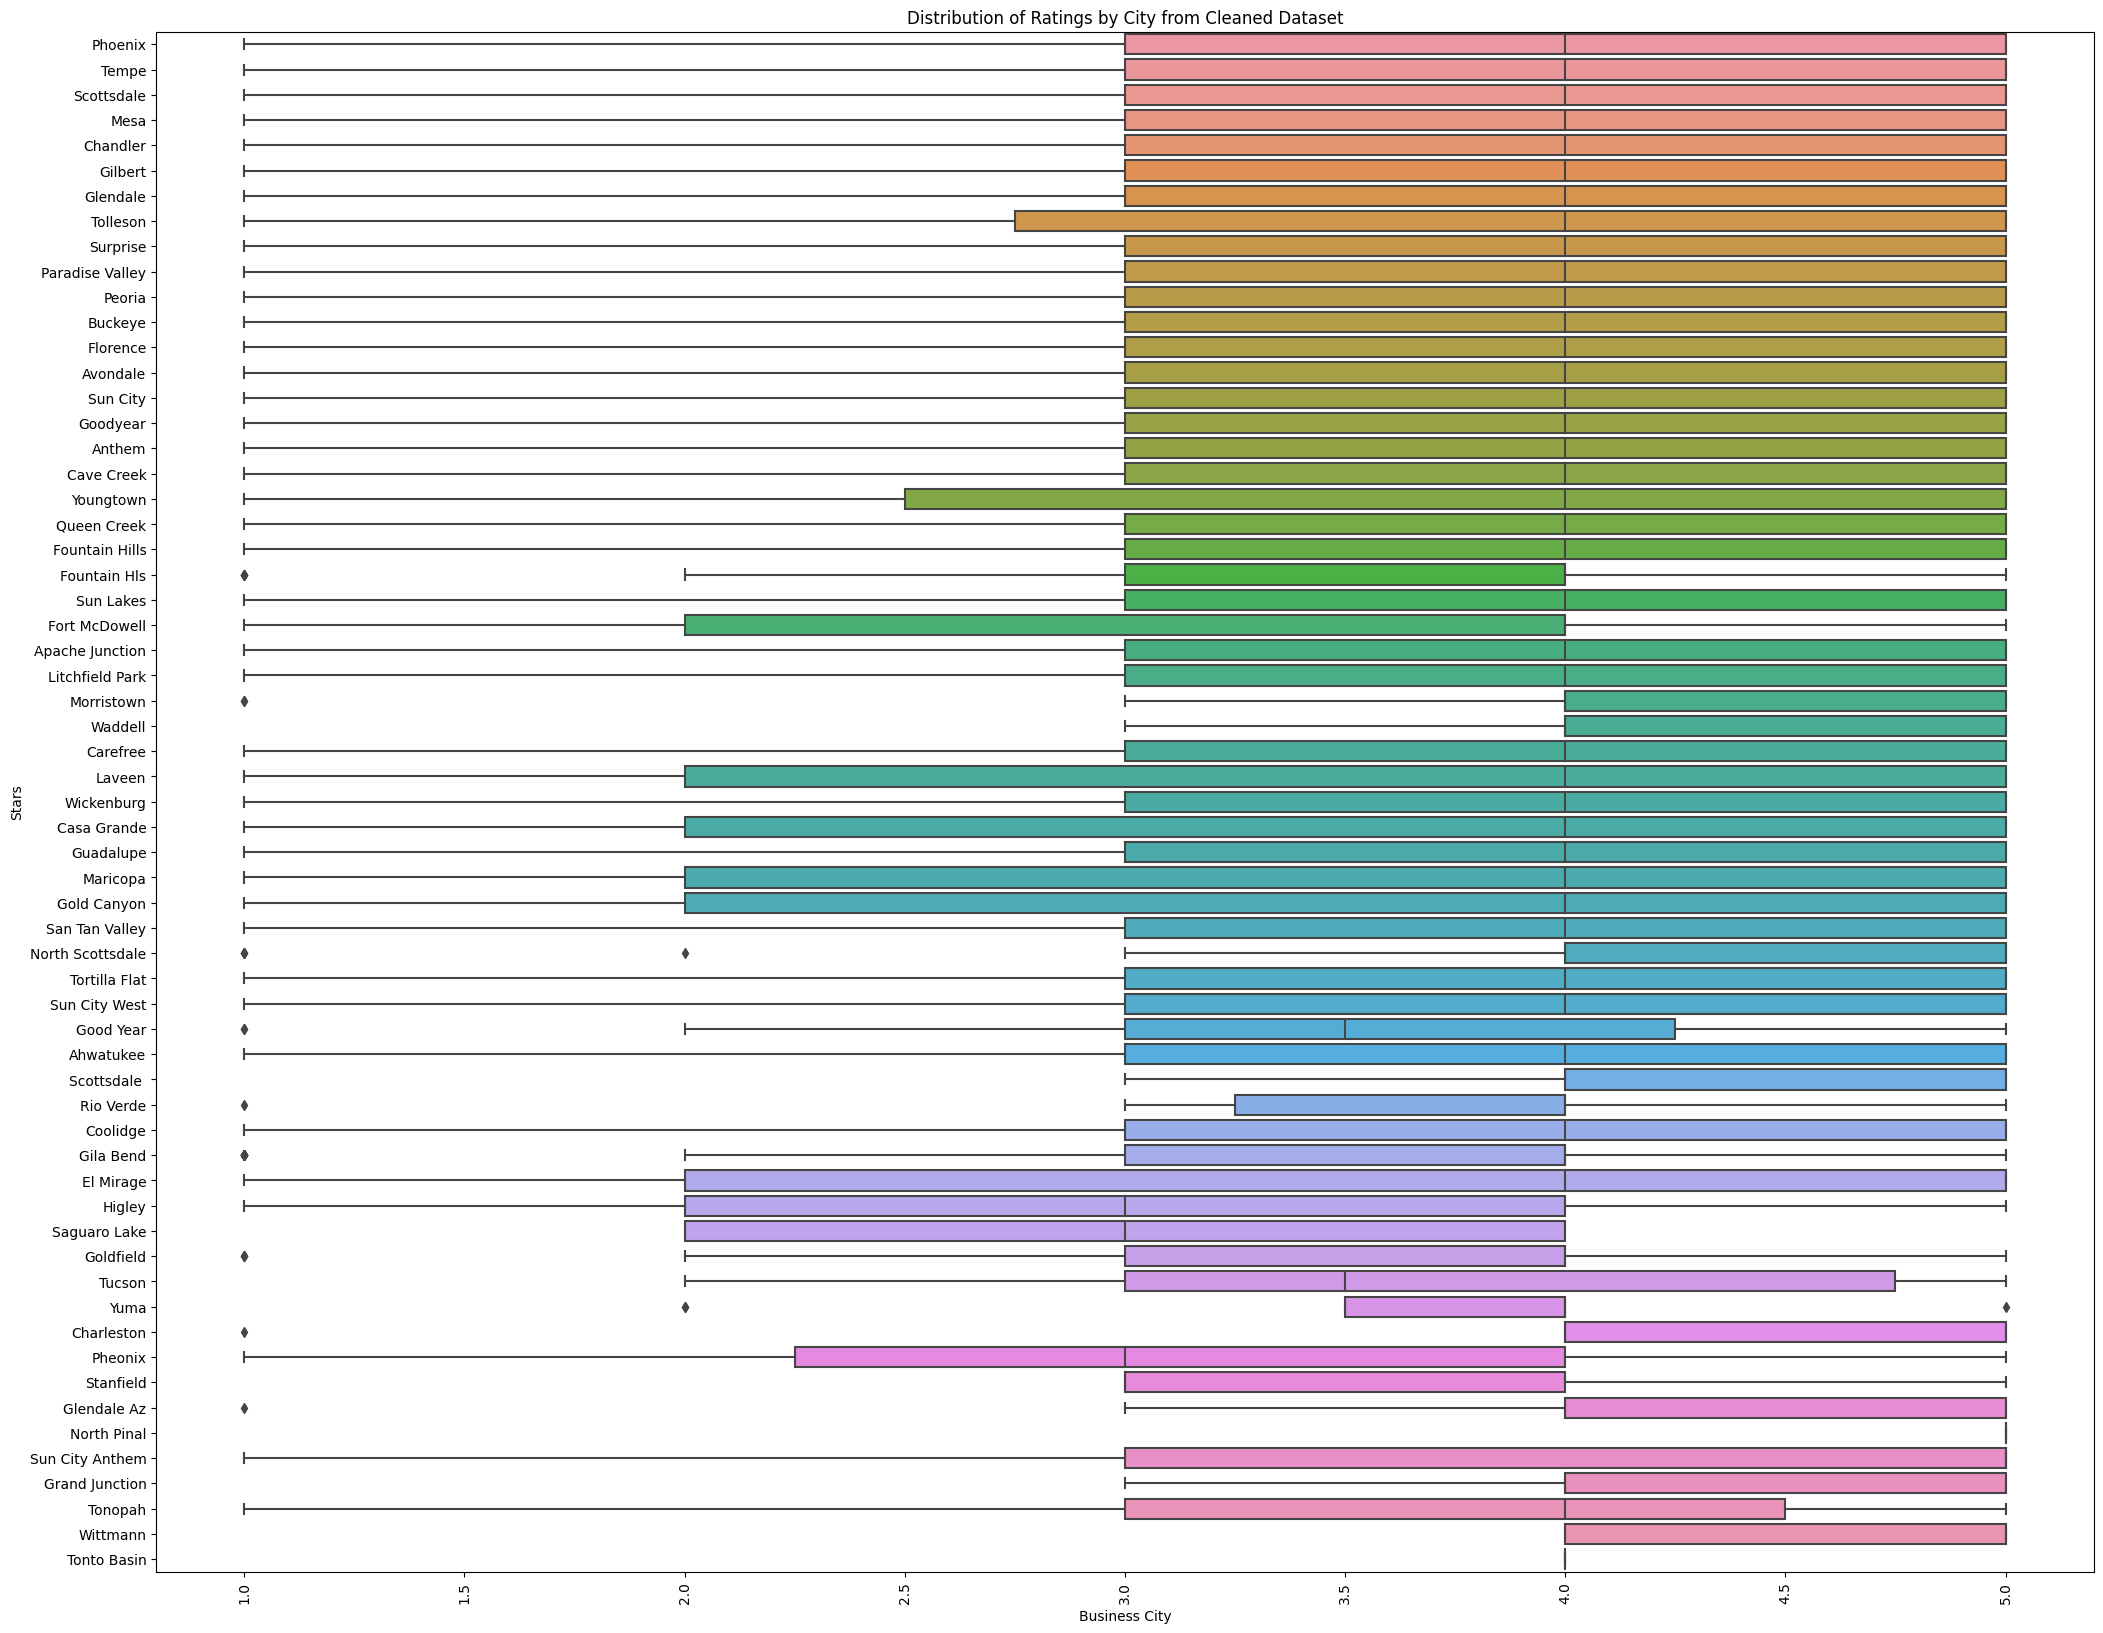

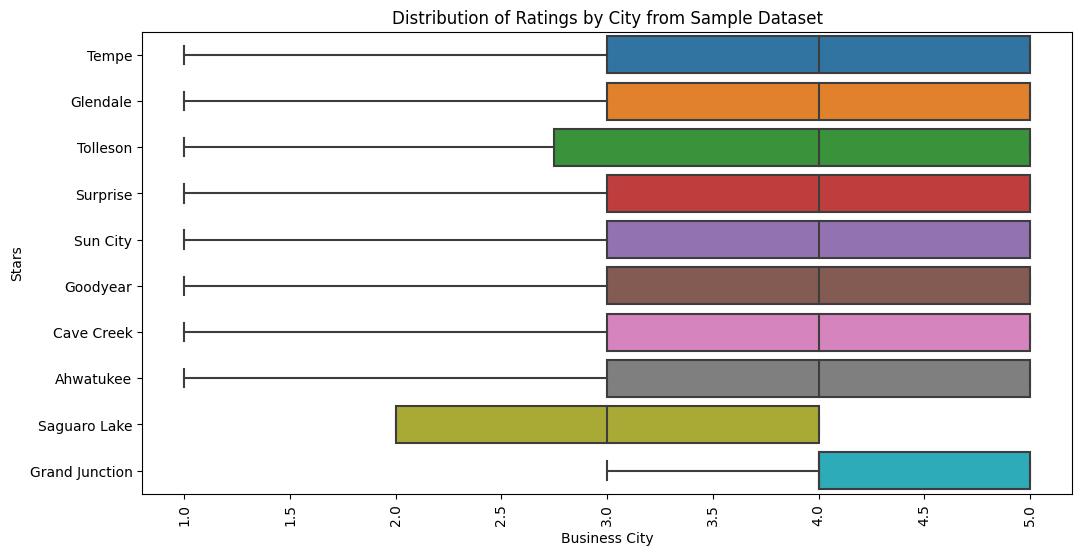

In [ ]:
# USING CLEANED DATASET

plt.figure(figsize=(25, 20))
sns.boxplot(x='stars', y='business_city', data=dsCleaned)
plt.title('Distribution of Ratings by City from Cleaned Dataset')
plt.xlabel('Business City')
plt.ylabel('Stars')
plt.xticks(rotation=90)
plt.show()

print("\n\n")

# USING SAMPLE DATASET

plt.figure(figsize=(12, 6))
sns.boxplot(x='stars', y='business_city', data=sampleData)
plt.title('Distribution of Ratings by City from Sample Dataset')
plt.xlabel('Business City')
plt.ylabel('Stars')
plt.xticks(rotation=90)
plt.show()

**SOME EXPLANATION AND SUMMARY RELATED TO YELP DATASET:**

What I learned from the dataset was that:

This dataset includes businesses from multiple cities, with varying numbers of businesses in each city. Furthermore, some cities have a larger concentration of businesses (Pheonix city), while others have fewer (Tonto Basin).

Although, I did not work on business_categories much but analyzing the distribution of businesses across categories can reveal popular or niche sectors that are popular among certain cities.

For the column 'useful' I learned that the distribution of review usefulness can provide insights into the impact and relevance of reviews on a user's decision-making.

For the column 'stars' shows that some business receive a lower rating than the other businesses and it can provide insights on what business would a user prefer due to reviews and ratings.
